In [1]:
import numpy as np
import pandas as pd
df= pd.read_csv('/home/ANA522/mod04/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv', sep=',')

In [2]:
from datetime import datetime
# convert Data column to be of type datetime.date
obj_to_date = lambda x: datetime.strptime(x,'%m/%d/%Y').date()
1
df['Date'] = df['Date'].apply(obj_to_date)
#df['Date']=pd.to_datetime(df['Date']).date()

In [3]:
### Retrieve State of Maryland data
# sorting by Date
df_date=df.sort_values(by='Date')
# reset index with order of values in Date
df_date.reset_index(inplace=True)
# drop original index column
df_date= df_date.drop(['index'],axis=1)
# use Date of datetime.date as index
df_date.index = df_date['Date']
# focus on Maryland (MD) Location
df_date_MD = df_date[df_date['Location']=='MD']
df_date_MD

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_12Plus,...,Administered_Dose1_Recip_5PlusPop_Pct,Series_Complete_5Plus,Series_Complete_5PlusPop_Pct,Administered_5Plus,Admin_Per_100k_5Plus,Distributed_Per_100k_5Plus,Series_Complete_Moderna_5Plus,Series_Complete_Pfizer_5Plus,Series_Complete_Janssen_5Plus,Series_Complete_Unk_Manuf_5Plus
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-14,2020-12-14,51,MD,1950,0,0,0,0,32,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-12-15,2020-12-15,51,MD,1950,0,0,0,0,32,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-12-16,2020-12-16,51,MD,1950,0,0,0,0,32,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-12-17,2020-12-17,51,MD,22425,0,0,0,0,371,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2020-12-18,2020-12-18,51,MD,22425,0,0,0,0,371,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-15,2022-02-15,7,MD,14759430,600100,4970920,9188410,0,244132,285876,...,89.8,4441391.0,78.1,11368475.0,200017.0,259678.0,1488229.0,2627072.0,322002.0,4088.0
2022-02-16,2022-02-16,7,MD,14787030,599900,4972320,9214810,0,244588,286410,...,89.8,4444561.0,78.2,11379690.0,200215.0,260164.0,1488934.0,2629454.0,322078.0,4095.0
2022-02-17,2022-02-17,7,MD,14887710,600300,5069900,9217510,0,246254,288360,...,89.9,4451414.0,78.3,11418619.0,200900.0,261935.0,1492235.0,2632790.0,322257.0,4132.0


In [4]:
### Zoom in on January 2022 data
# Transform index with DatetimeIndex from original date string index
dates_index_MD = pd.DatetimeIndex(df_date_MD.index)
df_date_MD.index = dates_index_MD
# select January 2022 (including last day of Dec 2021) from index with Distributed and Administered columns
df_Jan_2022_MD = df_date_MD['2021/12/31':'2022/01/31'][['Distributed','Administered','Series_Complete_Yes','Administered_Janssen','Administered_Moderna','Administered_Pfizer','Administered_Unk_Manuf']]
df_Jan_2022_MD

,Distributed,Administered,Series_Complete_Yes,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf
Date,,,,,,,
2021-12-31,13283750,10468179,4260165,346732,3855454,6251441,14552
2022-01-01,13281510,10468349,4260396,346732,3855481,6251584,14552
2022-01-02,13280810,10468349,4260396,346732,3855481,6251584,14552
2022-01-03,13280810,10502725,4264972,347178,3867494,6273479,14574
2022-01-04,13280810,10517952,4267296,347397,3872924,6283044,14587
2022-01-05,13416450,10540160,4270570,347731,3880595,6297232,14602
2022-01-06,13586620,10569548,4275073,348139,3890589,6316198,14622
2022-01-07,13586620,10595112,4279315,348507,3899913,6332047,14645
2022-01-08,13723320,10626464,4283729,348856,3910347,6352600,14661


In [5]:
# calculate the differences of dose increments from the day before
# the new table of doeses added daily
df_Jan_2022_MD_diff = df_Jan_2022_MD.diff().loc['2022/01']
df_Jan_2022_MD_diff

,Distributed,Administered,Series_Complete_Yes,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf
Date,,,,,,,
2022-01-01,-2240.0,170.0,231.0,0.0,27.0,143.0,0.0
2022-01-02,-700.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-03,0.0,34376.0,4576.0,446.0,12013.0,21895.0,22.0
2022-01-04,0.0,15227.0,2324.0,219.0,5430.0,9565.0,13.0
2022-01-05,135640.0,22208.0,3274.0,334.0,7671.0,14188.0,15.0
2022-01-06,170170.0,29388.0,4503.0,408.0,9994.0,18966.0,20.0
2022-01-07,0.0,25564.0,4242.0,368.0,9324.0,15849.0,23.0
2022-01-08,136700.0,31352.0,4414.0,349.0,10434.0,20553.0,16.0
2022-01-09,-200.0,24911.0,4241.0,228.0,6760.0,17919.0,4.0


<AxesSubplot:xlabel='Date'>

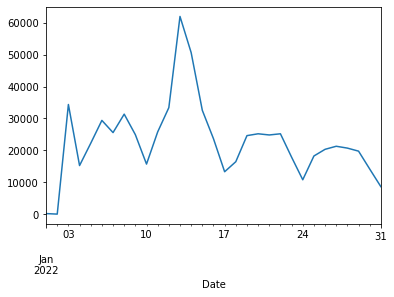

In [6]:
##Q01: Draw a Line plot for Administered doses

df_Jan_2022_MD_diff.Administered.plot()

<AxesSubplot:xlabel='Date'>

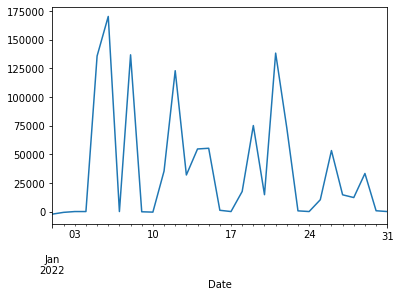

In [7]:
##Q02: Draw a Line plot for Distributed doses

df_Jan_2022_MD_diff.Distributed.plot()


<AxesSubplot:xlabel='Date'>

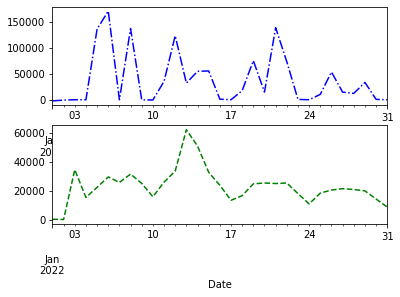

In [8]:
##Q03: Draw a Subplots for Distributed and Administered doses

import matplotlib.pyplot as plt

figure, axes = plt.subplots(2, 1)
df_Jan_2022_MD_diff.Distributed.plot(ax=axes[0], color="blue", linestyle='dashdot')
df_Jan_2022_MD_diff.Administered.plot(ax=axes[1], color="green", linestyle= 'dashed')


<AxesSubplot:xlabel='Date'>

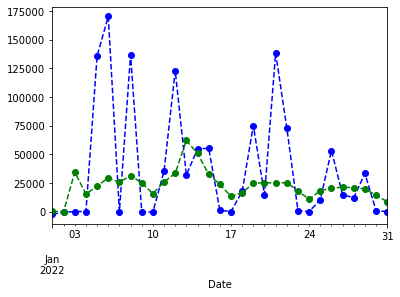

In [9]:
##Q04: Draw a Line plot for both Distributed and Administered doses with markers and using different colors.

figure, axes = plt.subplots(1, 1)
df_Jan_2022_MD_diff.Distributed.plot(color="blue", linestyle='dashed', marker='o')
df_Jan_2022_MD_diff.Administered.plot(color="green", linestyle= 'dashed', marker='o')

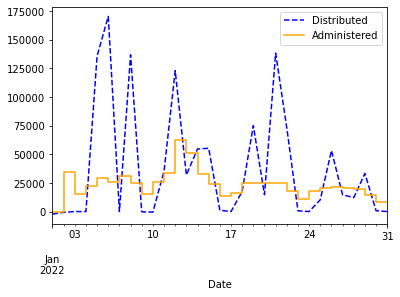

In [10]:
##Q05: Draw a Line plot for Distributed does with dashed line and Administered doses with steps
#with legends and different colors

figure, axes = plt.subplots(1, 1)
df_Jan_2022_MD_diff.Distributed.plot(color="blue", linestyle='dashed')
df_Jan_2022_MD_diff.Administered.plot(color="orange", linestyle='solid', drawstyle='steps')
plt.legend()

<AxesSubplot:xlabel='Date'>

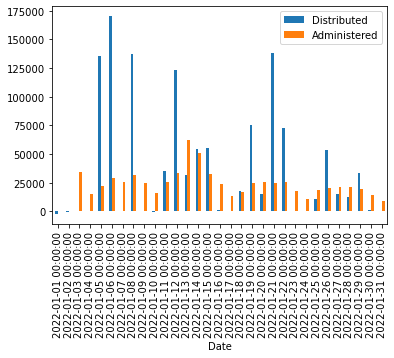

In [11]:
##Q06: Draw a Bar chat for both Distributed and Administered doses with legends and using different colors

df_Jan_2022_MD_diff.plot(y=["Distributed", "Administered"], kind="bar")


<AxesSubplot:ylabel='Date'>

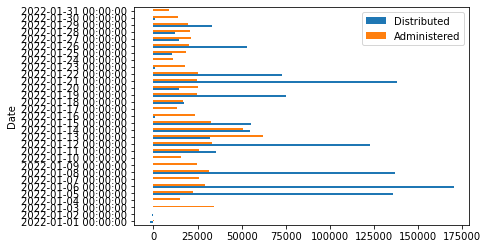

In [12]:
##Q07: Horizontal bar chat for both Distributed and Administered doses with legends and using different colors

df_Jan_2022_MD_diff.plot(y=["Distributed", "Administered"], kind="barh")


In [13]:
# Prepare for Q08.
# Prepare df_Jan_2022_MD_diff_idx dataframe to be used for Q08.
# First Reset index to have just counting numbers to be added to columns
df_Jan_2022_MD_diff_idx = df_Jan_2022_MD_diff.reset_index()
df_Jan_2022_MD_diff_idx['index']=df_Jan_2022_MD_diff_idx.index.to_series().shift(-1)
df_Jan_2022_MD_diff_idx

,Date,Distributed,Administered,Series_Complete_Yes,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf,index
0,2022-01-01,-2240.0,170.0,231.0,0.0,27.0,143.0,0.0,1.0
1,2022-01-02,-700.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2022-01-03,0.0,34376.0,4576.0,446.0,12013.0,21895.0,22.0,3.0
3,2022-01-04,0.0,15227.0,2324.0,219.0,5430.0,9565.0,13.0,4.0
4,2022-01-05,135640.0,22208.0,3274.0,334.0,7671.0,14188.0,15.0,5.0
5,2022-01-06,170170.0,29388.0,4503.0,408.0,9994.0,18966.0,20.0,6.0
6,2022-01-07,0.0,25564.0,4242.0,368.0,9324.0,15849.0,23.0,7.0
7,2022-01-08,136700.0,31352.0,4414.0,349.0,10434.0,20553.0,16.0,8.0
8,2022-01-09,-200.0,24911.0,4241.0,228.0,6760.0,17919.0,4.0,9.0
9,2022-01-10,-500.0,15690.0,2539.0,147.0,4234.0,11308.0,1.0,10.0


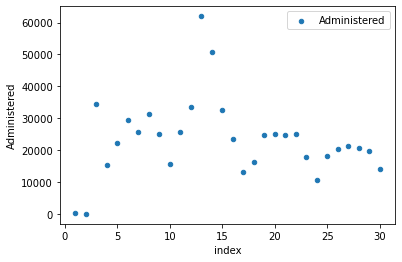

In [14]:
##Q08: Draw a Scatter plot for Administered doses with legends.

df_Jan_2022_MD_diff_idx.plot.scatter(x='index', y= 'Administered')
plt.legend(['Administered'])

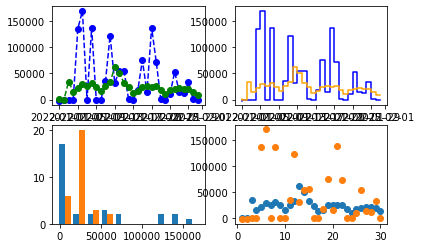

In [15]:
##Q09: Create a Matplot figure to accommodate line charts, histogram, and scatter plot as subplots.

import matplotlib.pyplot as plt

#figure, axes = plt.subplots(2,2)

x= 'index'
y1= df_Jan_2022_MD_diff.Distributed
y2= df_Jan_2022_MD_diff.Administered

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.plot(y1, linestyle='dashed', marker='o', color="blue") 
ax0.plot(y2, linestyle='dashed', marker='o', color="green")

ax1.plot(y1,color="blue", linestyle='solid', drawstyle='steps')
ax1.plot(y2,color="orange", linestyle='solid', drawstyle='steps')

ax2.hist(df_Jan_2022_MD_diff_idx[['Distributed','Administered']])

ax3.scatter(x = df_Jan_2022_MD_diff_idx['index'], y = df_Jan_2022_MD_diff_idx['Administered'])
ax3.scatter(x = df_Jan_2022_MD_diff_idx['index'], y = df_Jan_2022_MD_diff_idx['Distributed'])


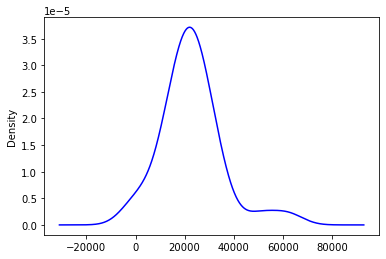

In [16]:
###Q10: Create either a density distribution plot from Administered column (or with histogram bins
##set to 10 using seaborn)

import seaborn as sns

df_Jan_2022_MD_diff_idx.Administered.plot.density(color='blue')
plt.show()

/opt/conda/envs/ADA522/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administered', ylabel='Density'>

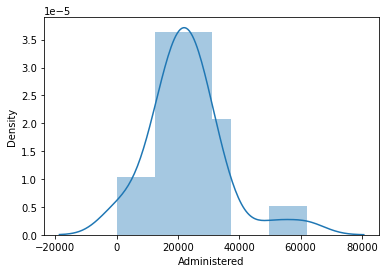

In [17]:

sns.distplot(df_Jan_2022_MD_diff_idx.Administered, bins=10)

In [18]:
# Preparation for Q11
# Preparation for the normalized 3-day dataframe,df_Jan_2022_MD_diff_Vaccin_normal_3days, for plotting
# Create subset DataFrame of various vaccines administered
df_Jan_2022_MD_diff_Vaccin = df_Jan_2022_MD_diff.loc[:,'Administered_Janssen':]
df_Jan_2022_MD_diff_Vaccin

,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf
Date,,,,
2022-01-01,0.0,27.0,143.0,0.0
2022-01-02,0.0,0.0,0.0,0.0
2022-01-03,446.0,12013.0,21895.0,22.0
2022-01-04,219.0,5430.0,9565.0,13.0
2022-01-05,334.0,7671.0,14188.0,15.0
2022-01-06,408.0,9994.0,18966.0,20.0
2022-01-07,368.0,9324.0,15849.0,23.0
2022-01-08,349.0,10434.0,20553.0,16.0
2022-01-09,228.0,6760.0,17919.0,4.0


In [19]:
# Normalize the numbers of doses from different vaccines
df_Jan_2022_MD_diff_Vaccin_normal = df_Jan_2022_MD_diff_Vaccin.div(df_Jan_2022_MD_diff_Vaccin.sum(1),axis=0)
df_Jan_2022_MD_diff_Vaccin_normal

,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf
Date,,,,
2022-01-01,0.000000,0.158824,0.841176,0.000000
2022-01-02,NaN,NaN,NaN,NaN
2022-01-03,0.012974,0.349459,0.636927,0.000640
2022-01-04,0.014382,0.356603,0.628161,0.000854
2022-01-05,0.015040,0.345416,0.638869,0.000675
2022-01-06,0.013883,0.340071,0.645365,0.000681
2022-01-07,0.014395,0.364732,0.619973,0.000900
2022-01-08,0.011132,0.332802,0.655556,0.000510
2022-01-09,0.009153,0.271366,0.719321,0.000161


In [20]:
# Get data entries of every three days
df_Jan_2022_MD_diff_Vaccin_normal_3days = df_Jan_2022_MD_diff_Vaccin_normal[::3]
df_Jan_2022_MD_diff_Vaccin_normal_3days

,Administered_Janssen,Administered_Moderna,Administered_Pfizer,Administered_Unk_Manuf
Date,,,,
2022-01-01,0.000000,0.158824,0.841176,0.000000
2022-01-04,0.014382,0.356603,0.628161,0.000854
2022-01-07,0.014395,0.364732,0.619973,0.000900
2022-01-10,0.009369,0.269853,0.720714,0.000064
2022-01-13,0.016778,0.353870,0.623270,0.006082
2022-01-16,0.007190,0.293846,0.698879,0.000085
2022-01-19,0.011986,0.300939,0.685979,0.001097
2022-01-22,0.011830,0.321596,0.665304,0.001270
2022-01-25,0.012729,0.273126,0.711456,0.002688


<AxesSubplot:xlabel='Date'>

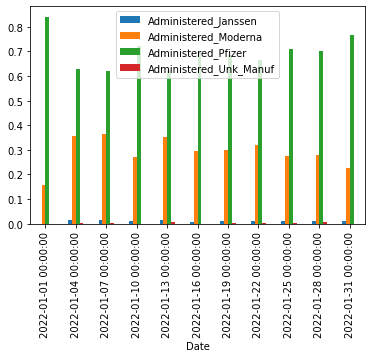

In [21]:
###Q11: Draw a Bar plot of normalized 3-day vaccines,of Administered_Janssen, Administered_
##Moderna, Administered_Pfizer, Administered_Unk_Manuf columns

df_Jan_2022_MD_diff_Vaccin_normal_3days.plot(kind="bar")


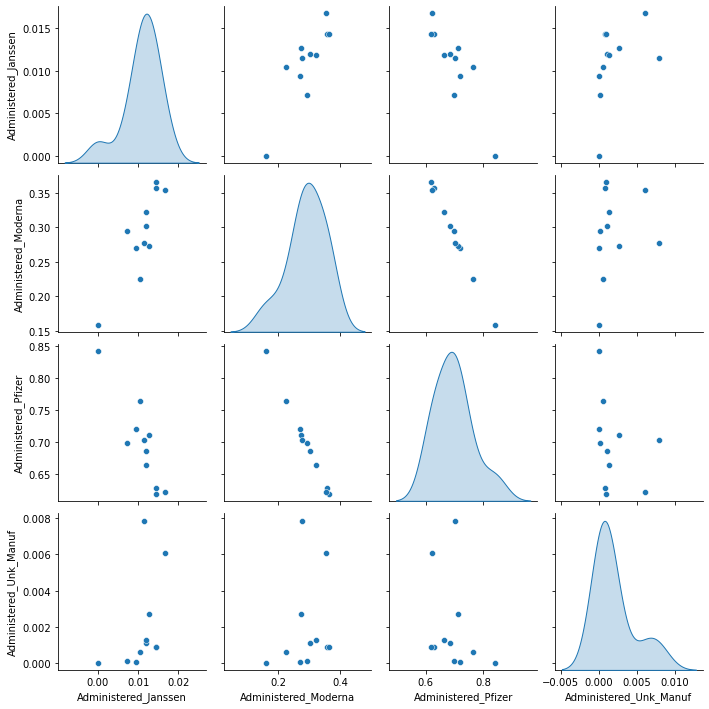

In [22]:
###Q12: Create a pairs plot or scatter plot matrix in between Administered_Janssen, Administered_Moderna,
#Administered_Pfizer, Administered_Unk_Manuf columns using seaborn. (either one)

import seaborn as sns

sns.pairplot(df_Jan_2022_MD_diff_Vaccin_normal_3days, diag_kind='kde', plot_kws={'alpha': 1})

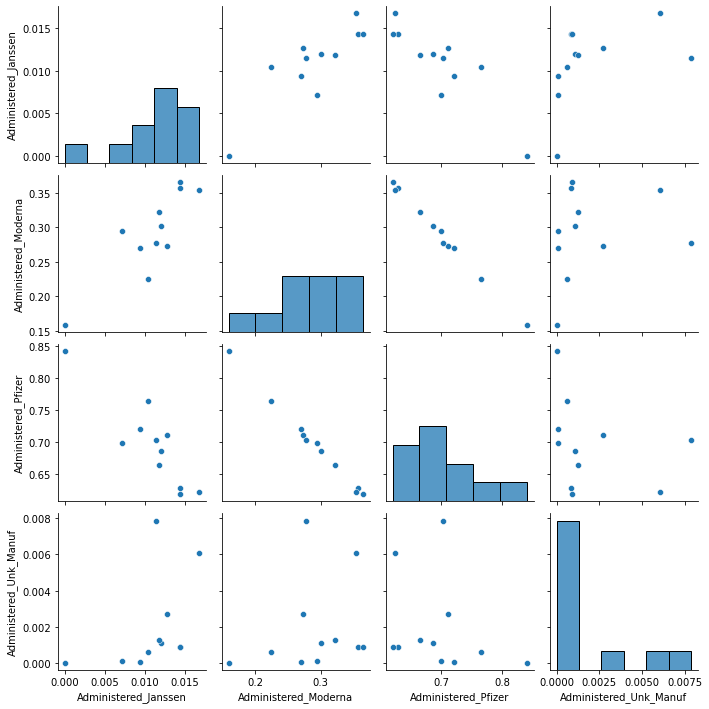

In [23]:

sns.pairplot(df_Jan_2022_MD_diff_Vaccin_normal_3days )